In [ ]:
# Simple Moving Average -> Two conditions

# If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.
# When the price becomes less than the SMA12, we square off our long position.

# Trading rules ->

# Buy when price > SMA12
# Square off when price < SMA12

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
(2400, 6)
                                   Open          High           Low  \
Datetime                                                              
2024-04-10 09:15:00+05:30  22720.250000  22721.849609  22687.599609   
2024-04-10 09:20:00+05:30  22697.900391  22707.500000  22679.449219   
2024-04-10 09:25:00+05:30  22706.800781  22720.050781  22704.650391   
2024-04-10 09:30:00+05:30  22716.150391  22727.099609  22711.199219   
2024-04-10 09:35:00+05:30  22716.500000  22722.750000  22702.300781   

                                  Close     Adj Close  Volume  
Datetime                                                       
2024-04-10 09:15:00+05:30  22697.699219  22697.699219       0  
2024-04-10 09:20:00+05:30  22707.500000  22707.500000       0  
2024-04-10 09:25:00+05:30  22715.900391  22715.900391       0  
2024-04-10 09:30:00+05:30  22716.900391  22716.900391       0  
2

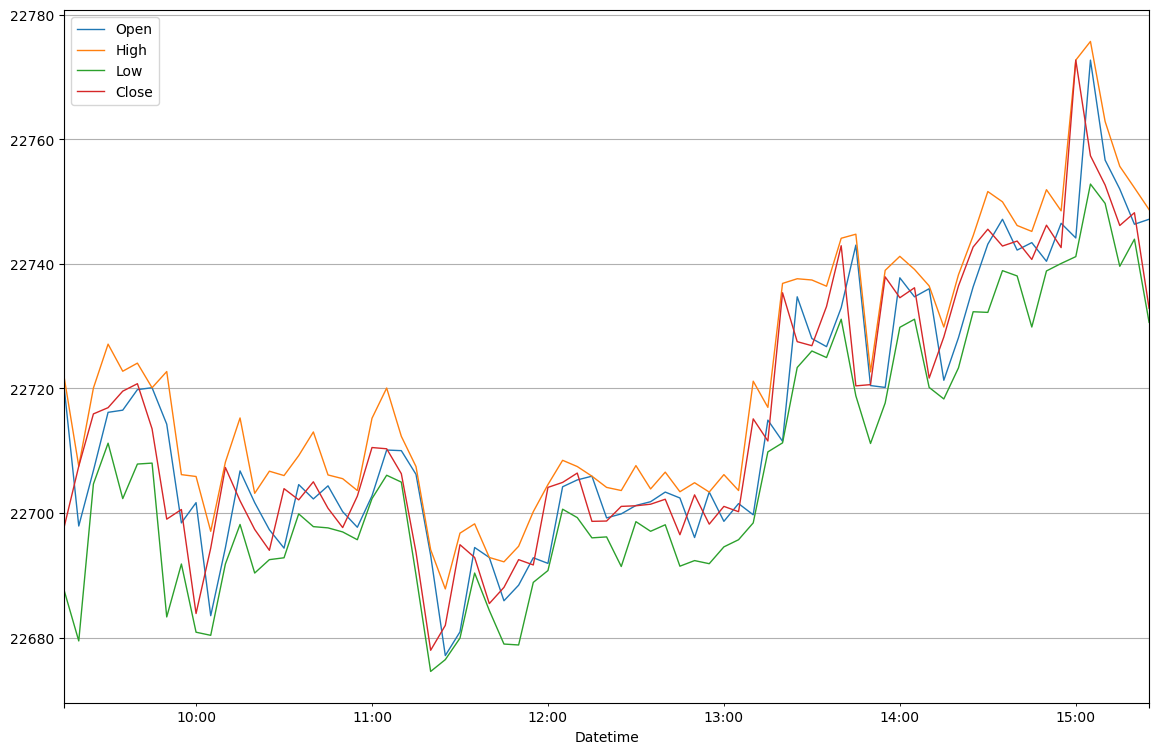

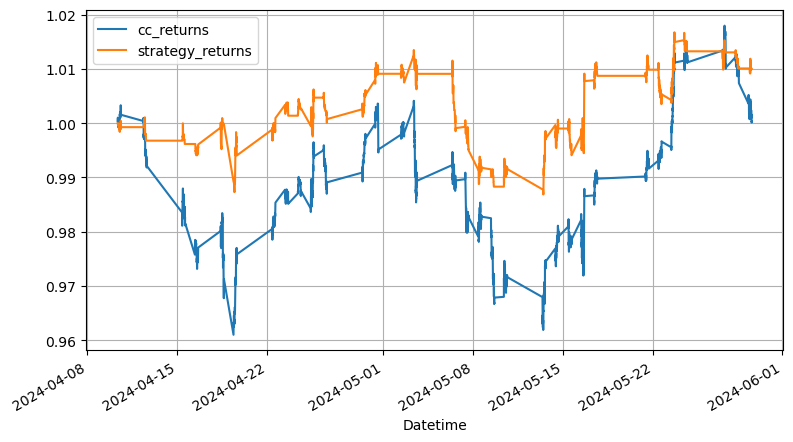

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
##############################################################################
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
##############################################################################
end1 = datetime.date.today()
start1 = end1 - pd.Timedelta(days=50)
##############################################################################
df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df1a = df.copy()
##############################################################################
df1a.loc['2024-04-10', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9))

df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)

df1a['cc_returns'] = df1a['Close'].pct_change()

sma = 12
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()

df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)

print(df1a['position'].value_counts())

print(df1a.head())
print(df1a.tail())
##############################################################################
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

df1a['strategy_returns'] = 1 + df1a['strategy_returns']
df1a['cc_returns'] = 1 + df1a['cc_returns']

print(df1a.head())
print(df1a.tail())

df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 2))

In [ ]:
#### Exponential Moving Average (Long only) ####

In [ ]:
df1b = df.copy()
##############################################################################
df1b['cc_returns'] = df1b['Close'].pct_change()
##############################################################################
ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean()
print(df1b.head())
print(df1b.tail())
##############################################################################
df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(2)
##############################################################################
df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())
##############################################################################
df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']
##############################################################################
df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head())
print(df1b.tail())
##############################################################################
df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))

print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 2))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 2))